In [78]:
import os, re, csv
import pandas as pd
import numpy as np
import gensim, nltk
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from itertools import islice
import matplotlib.pyplot as plt

### Get URL list

In [79]:
nl = pd.read_csv('url_lists/NL_urls.csv')
nl_urls = nl['NL domains'].values.tolist() 
nl_urls[3:6]

['https://www.glk.nl', 'http://www.weldam.nl', 'https://www.kasteelheeze.nl']

### Preprocessing tools

In [80]:
from textcleaning import textCleaner, textCleanerFurther, textCleanLinks

In [81]:
# load a list of 'stopwords' in the language you are analyzing
def get_stopwords_list(stop_file_path):
    """load stop words """  
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return list(frozenset(stop_set))
stopwords_path = "stopwords_archive/NL.txt"
stopwords = get_stopwords_list(stopwords_path)

In [82]:
special_stop_words = ['nbsp', 'the', 'and']
stopwords_ext = stopwords+special_stop_words

# 2018 ALL COUNTRIES

In [83]:
nl_path = "../met-naam-2018/castles-netherlands/"
uk_path = "../met-naam-2018/castles-united-kingdom/"
de_path = "../met-naam-2018/castles-germany/"
fr_path = "../met-naam-2018/castles-france/"

In [ ]:
# count number of words per website



# 1. Loading text 

In [96]:
# DUTCH -> replace nl_path
folder_path = nl_path
read_files = lambda folder_path: pd.DataFrame(
    [{'domain': filename, 'text': open(os.path.join(folder_path, filename), 'r').read()} 
     for filename in os.listdir(folder_path) if filename.endswith('.txt')])

# Example usage
df = read_files(folder_path)

# Print the DataFrame
df.head()

,domain,text
0,buitenplaatsbeeckestijnnl.txt,Home - Buitenplaats Beeckestijn Beeckestijn ...
1,glknl.txt,GLK | Van kasteel naar kasteel Spelen in de n...
2,dewierssecom.txt,Stagiaires | De Wiersse Contactformulier In j...
3,weldamnl.txt,\n Die Geschichte - Weldam\n \n ...
4,kasteelheezenl.txt,"Home - Kasteel Heeze Kapelstraat 25, Postbus ..."


In [97]:
len(df)

55

# 2. Counting terms 

In [71]:
### NL TERM LISTS
#term_list = ['ongelijkheid', 'democratie', 'armoede']
#term_list = ['slavernij', 'slaaf', 'slaven']
#term_list = ['diversiteit', 'biodiversiteit', 'inclusiviteit']
#term_list = ['koloni']
term_list = ['bediende', 'arbeider']

In [98]:
terms_list_all = ['koloni', 'slaaf', 'slaven', 'slavernij',
                  'ongelijkheid', 'democratie', 'armoede',
                  'bediende', 'arbeider']

In [12]:
### UK TERM LISTS
term_list = ['coloni']
#term_list = ['inequality','democracy','poverty']
#term_list = ['slave','slavery']
#term_list = ['diversity', 'inclusion']
#term_list = ['servant','worker','labourer']

In [25]:
terms_list_all = ['coloni','slave','slavery',
                  'inequality','democracy','poverty',
                  'servant','worker','labourer']

In [32]:
### DE TERM LISTS
#term_list = ['koloni']
#term_list = ['ungleichheit','demokratie','armut']
#term_list = ['sklave','sklaverei']
#term_list = ['diversität','inklusion]
term_list = ['diener','arbeiter']

In [43]:
terms_list_all = ['koloni','sklave','sklaverei',
                  'ungleichheit','demokratie','armut',
                  'diener','arbeiter']

In [94]:
### FR TERM LISTS
#term_list = ['coloni']
#term_list = ['inégalité','démocratie','pauvreté']
#term_list = ['esclave','esclavage']
#term_list = ['diversité','inclusion]
#term_list = ['serviteur','ouvrier'] 
term_list = ['rococo', 'baroque', 'renaissance', 'gothique']

In [47]:
terms_list_all = ['coloni','esclave','esclavage',
                  'inégalité','démocratie','pauvreté',
                  'serviteur','travailleur','ouvrier']

In [ ]:
# count terms from a short list of terms: 
for term in term_list:
    df[term] = df['text'].apply(lambda x: x.lower().count(term) if isinstance(x, str) else 0)

# Filter for rows where 'kasteel' appears at least once
mask = (df[term_list] > 0).any(axis=1)

# Filter the DataFrame based on the boolean mask.
df_filtered = df[mask]

# Create the five-column table
filter_list = ['domain'] + term_list
result_df = df_filtered[filter_list]
result_df.to_csv('outputs/2018_filtered_output.csv', index=False)
print(result_df.to_string())

In [99]:
# count all terms for a country:
for term in terms_list_all:
    df[term] = df['text'].apply(lambda x: x.lower().count(term) if isinstance(x, str) else 0)

# Filter for rows where 'kasteel' appears at least once
mask = (df[terms_list_all] > 0).any(axis=1)

# Filter the DataFrame based on the boolean mask.
df_filtered = df[mask]

# Create the five-column table
filter_list = ['domain'] + terms_list_all
result_df = df_filtered[filter_list]
result_df.to_csv('outputs/2018_filtered_output.csv', index=False)
print(result_df.to_string())

                     domain  koloni  slaaf  slaven  slavernij  ongelijkheid  democratie  armoede  bediende  arbeider
1                 glknl.txt       2      1       0          0             0           0        0         1         2
2          dewierssecom.txt       1      0       0          0             0           0        0         0         0
7          slotzuylennl.txt       1      0       0          0             0           0        0         1         0
10     slotloevesteinnl.txt       0      0       0          0             0           1        0         0         0
16          huisberghnl.txt       0      0       0          0             0           0        0         1         1
17          sypesteynnl.txt       0      0       0          0             0           0        1         0         0
19    fogelsanghstatenl.txt       1      0       0          0             0           0        0         0         0
22      kasteeltuinennl.txt       0      0       0          0   

Visualize the results

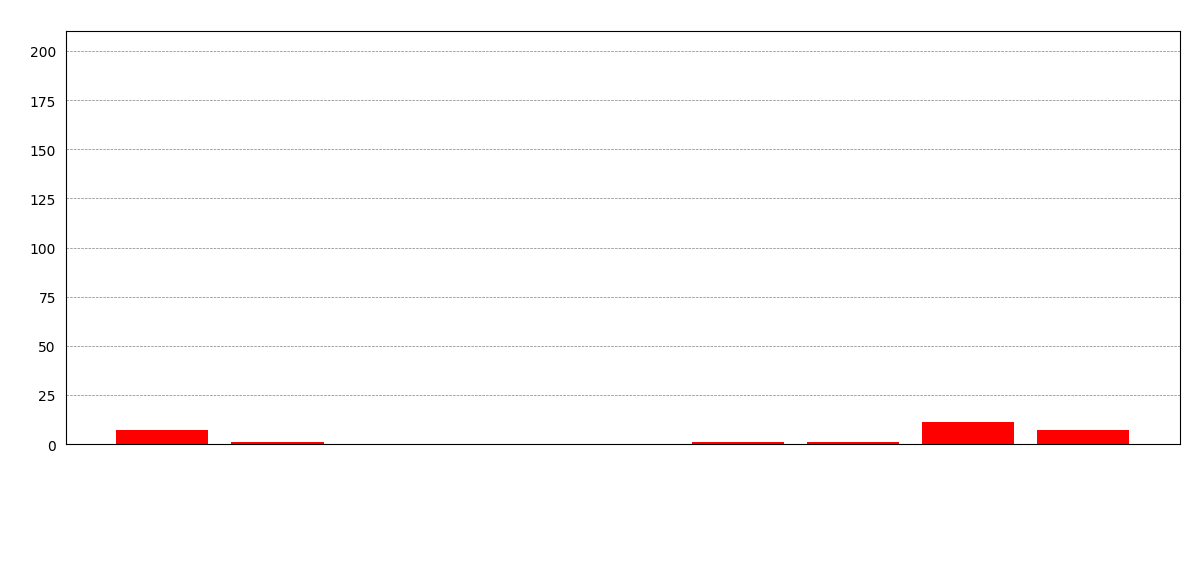

In [102]:
# Calculate the sum of values for each specified column
column_sums = result_df[terms_list_all].sum()

# Create a bar chart with pink bars
plt.figure(figsize=(12, 6))
# Add horizontal lines for values in the legend
for value in [25, 50, 75, 100, 125, 150, 175, 200]:
  plt.axhline(y=value, color='grey', linestyle='--', linewidth=0.5)
plt.bar(column_sums.index, column_sums.values, color='red')

# Customize the plot
plt.xlabel("Terms", color='white')
plt.ylabel("Sum of term frequencies", color='white')
plt.title("Frequency of terms analysed in 2018 corpus of Dutch websites", color='white')
plt.xticks(rotation=45, ha="right", color='white')
plt.tick_params(axis='x', color='white')
plt.tick_params(axis='y', color='white')
# Add two columns from the df dataframe on the left
plt.text(-0.8, -60, f"total websites: {len(df.domain.unique())}", fontsize=10, color='white')
plt.tight_layout()
plt.savefig("outputs/NL_2018_all_terms.png", transparent=True)
plt.show()

In [60]:
# drop columns to reset
df = df.drop(term_list, axis=1)
df.head()

,domain,text
0,buitenplaatsbeeckestijnnl.txt,Home - Buitenplaats Beeckestijn Beeckestijn ...
1,glknl.txt,GLK | Van kasteel naar kasteel Spelen in de n...
2,dewierssecom.txt,Stagiaires | De Wiersse Contactformulier In j...
3,weldamnl.txt,\n Die Geschichte - Weldam\n \n ...
4,kasteelheezenl.txt,"Home - Kasteel Heeze Kapelstraat 25, Postbus ..."


### term frequency, all

In [263]:
cvec_all = CountVectorizer().fit(df.text)
df_matrix_all = cvec_all.transform(df.text)
df_all = np.sum(df_matrix_all,axis=0)
terms = np.squeeze(np.asarray(df_all))
print(terms.shape)
term_freq_df_all = pd.DataFrame([terms],columns=cvec_all.get_feature_names_out()).transpose() #term_freq_df is with stopwords
term_freq_df_all.columns = ['terms']
term_freq_df_all.sort_values(by='terms', ascending=False).iloc[:20]

(56982,)


,terms
de,38374
van,27151
het,20198
en,19712
een,15934
in,15843
op,9727
is,8705
met,8394
voor,6531


### term frequency, without stop words

In [262]:
cvec_stopped = CountVectorizer(stop_words=stopwords_ext) # see above, import frozenset from stopwords_archive in correct language
cvec_stopped.fit(df.text)
document_matrix = cvec_stopped.transform(df.text)
term_batches = np.linspace(0,document_matrix.shape[0],10).astype(int) 
i=0
df_stopped = []
while i < len(term_batches)-1:
    batch_result = np.sum(document_matrix[term_batches[i]:term_batches[i+1]].toarray(),axis=0)
    df_stopped.append(batch_result)
    print(term_batches[i+1],"entries' term frequency calculated")
    i += 1

terms_stopped = np.sum(df_stopped,axis=0)
print(terms_stopped.shape)
term_freq_df_stopped = pd.DataFrame([terms_stopped],columns=cvec_stopped.get_feature_names_out()).transpose() 
term_freq_df_stopped.columns = ['terms']
term_freq_df_stopped.sort_values(by='terms', ascending=False).iloc[:20]

6 entries' term frequency calculated
12 entries' term frequency calculated
18 entries' term frequency calculated
24 entries' term frequency calculated
30 entries' term frequency calculated
36 entries' term frequency calculated
42 entries' term frequency calculated
48 entries' term frequency calculated
55 entries' term frequency calculated
(56879,)


,terms
kasteel,6438
slot,3274
zuylen,2721
landgoed,1735
huis,1649
00,1403
we,1381
duivenvoorde,1330
jaar,1329
uur,1226


In [ ]:
# Plot Zipf's law table

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from pylab import *
counts = term_freq_df_all.terms
tokens = term_freq_df_all.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(10,10))
plt.rc('font', size=14)
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for tweets tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

# 3. Language processing tools 

## TF-IDF

In [264]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [265]:
#tfidf_vectorizer = TfidfVectorizer(input='filename', stop_words=stopwords)
#tfidf_vector = tfidf_vectorizer.fit_transform(df.filename)

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stopwords_ext)
# Fit and transform the text data
tfidf_matrix = vectorizer.fit_transform(df['text'])
# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
# Add filenames as index
tfidf_df.index = df['domain']
# Print the TF-IDF DataFrame
tfidf_df.head()

,00,000,0004,0007,000ste,001,0014,0015,0016,0018,...,юбилею,ҧm,ӧffnungszeiten,ԑ8e,ۅh,ۮu,ۯ8,ߛi,丶ya,瓌c
domain,,,,,,,,,,,,,,,,,,,,,
buitenplaatsbeeckestijnnl.txt,0.047334,0.002860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
glknl.txt,0.026301,0.011002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dewierssecom.txt,0.020558,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
weldamnl.txt,0.012912,0.003121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
kasteelheezenl.txt,0.027679,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [266]:
# Add column for document frequency aka number of times word appears in all documents
tfidf_df.loc['ALL'] = (tfidf_df > 0).sum()

In [267]:
tfidf_df.head() # first five rows

,00,000,0004,0007,000ste,001,0014,0015,0016,0018,...,юбилею,ҧm,ӧffnungszeiten,ԑ8e,ۅh,ۮu,ۯ8,ߛi,丶ya,瓌c
domain,,,,,,,,,,,,,,,,,,,,,
buitenplaatsbeeckestijnnl.txt,0.047334,0.002860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
glknl.txt,0.026301,0.011002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dewierssecom.txt,0.020558,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
weldamnl.txt,0.012912,0.003121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
kasteelheezenl.txt,0.027679,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [268]:
# 10 most frequent words!

tfidf_slice = tfidf_df[term_freq_df_stopped.sort_values(by='terms', ascending=False).iloc[:10].index.tolist()]
tfidf_slice.sort_index().round(decimals=2).head() # first five rows

,kasteel,slot,zuylen,landgoed,huis,00,we,duivenvoorde,jaar,uur
domain,,,,,,,,,,
ALL,44.00,22.0,4.0,33.00,42.00,44.00,44.00,3.0,48.00,45.00
artlandtop.txt,0.09,0.0,0.0,0.01,0.04,0.02,0.01,0.0,0.00,0.02
beeldentuinravesteynnl.txt,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00
buitenplaatsbeeckestijnnl.txt,0.00,0.0,0.0,0.00,0.09,0.05,0.00,0.0,0.01,0.03
dekemastatenl.txt,0.01,0.0,0.0,0.00,0.00,0.01,0.02,0.0,0.01,0.01


In [269]:
# reorganize the DataFrame so that the words are in rows rather than columns
tfidf_df = tfidf_df.drop('ALL', errors='ignore')
tfidf_df = tfidf_df.stack().reset_index()
tfidf_df.head()

,domain,level_1,0
0,buitenplaatsbeeckestijnnl.txt,00,0.047334
1,buitenplaatsbeeckestijnnl.txt,000,0.002860
2,buitenplaatsbeeckestijnnl.txt,0004,0.000000
3,buitenplaatsbeeckestijnnl.txt,0007,0.000000
4,buitenplaatsbeeckestijnnl.txt,000ste,0.000000


In [270]:
tfidf_df = tfidf_df.rename(columns={0:'tfidf', 'domain': 'document','level_1': 'term'})
tfidf_df.head()

,document,term,tfidf
0,buitenplaatsbeeckestijnnl.txt,00,0.047334
1,buitenplaatsbeeckestijnnl.txt,000,0.002860
2,buitenplaatsbeeckestijnnl.txt,0004,0.000000
3,buitenplaatsbeeckestijnnl.txt,0007,0.000000
4,buitenplaatsbeeckestijnnl.txt,000ste,0.000000


In [271]:
tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head()

,document,term,tfidf
3080253,artlandtop.txt,artland,0.485303
3118328,artlandtop.txt,strijthagen,0.363977
3120146,artlandtop.txt,top,0.219235
3105209,artlandtop.txt,middot,0.202209
3099896,artlandtop.txt,kasteelcomplex,0.181117
...,...,...,...
1863479,~$wmuiderslotnl.txt,savic,0.707107
1864432,~$wmuiderslotnl.txt,selena,0.707107
1820128,~$wmuiderslotnl.txt,00,0.000000
1820129,~$wmuiderslotnl.txt,000,0.000000


In [18]:
#!pip3 install altair

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try brew install
    xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a Python library that isn't in Homebrew,
    use a virtual environment:
    
    python3 -m venv path/to/venv
    source path/to/venv/bin/activate
    python3 -m pip install xyz
    
    If you wish to install a Python application that isn't in Homebrew,
    it may be easiest to use 'pipx install xyz', which will manage a
    virtual environment for you. You can install pipx with
    
    brew install pipx
    
    You may restore the old behavior of pip by passing
    the '--break-system-packages' flag to pip, or by adding
    'break-system-packages = true' to your pip.conf file. The latter
    will permanently disable this error.
    
    If you disable this error, we STRONGLY recommend that you additionally
    pass the '--user' flag to pip, or set 

In [272]:
import altair as alt

top_tfidf = tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(10) 

# Terms in this list will get a red dot in the visualization
term_list = ['kasteel', 'huis']

# adding a little randomness to break ties in term ranking
top_tfidf_plusRand = top_tfidf.copy()
top_tfidf_plusRand['tfidf'] = top_tfidf_plusRand['tfidf'] + np.random.rand(top_tfidf.shape[0])*0.0001

# base for all visualizations, with rank calculation
base = alt.Chart(top_tfidf_plusRand).encode(
    x = 'rank:O',
    y = 'document:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["document"],
)

# heatmap specification
heatmap = base.mark_rect().encode(
    color = 'tfidf:Q'
)

# red circle over terms in above list
circle = base.mark_circle(size=100).encode(
    color = alt.condition(
        alt.FieldOneOfPredicate(field='term', oneOf=term_list),
        alt.value('red'),
        alt.value('#FFFFFF00')        
    )
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
(heatmap + circle + text).properties(width = 600)

alt.LayerChart(...)

## Collocations

In [53]:
# Find keywords in context: 3 words + term + 3 words
keyword = 'jonkvrouw'

def find_keyword_context(df, keyword):
  new_df = pd.DataFrame(columns=['domain', 'context'])
  for index, row in df.iterrows():
    text = row['text']
    if isinstance(text, str):
      words = text.split()
      for i in range(len(words)):
        if words[i].lower() == keyword.lower():
          start = max(0, i - 3) # 3 words before
          end = min(len(words), i + 4) # 3 words after
          context = ' '.join(words[start:end])
          new_df = pd.concat([new_df, pd.DataFrame({'domain': [row['domain']], 'context': [context]})], ignore_index=True)
  return new_df

context_df = find_keyword_context(df, keyword)
context_df

,domain,context
0,buitenplaatsbeeckestijnnl.txt,"de laatste eigenares, jonkvrouw Agnes Cremers-..."
1,glknl.txt,"eerst verkleden tot jonkvrouw of ridder, daarna"
2,slotzuylennl.txt,scène waarin een jonkvrouw vanuit haar kamer
3,slotzuylennl.txt,"het voorplein, een jonkvrouw bij de Slangenmuur"
4,slotzuylennl.txt,trouwdag Foto van jonkvrouw Cornélie Marie van
...,...,...
249,kasteelhoensbroeknl.txt,wordt ontvangen door jonkvrouw Cecilia. Cecili...
250,muiderslotnl.txt,Verander in een jonkvrouw of ridder op
251,muiderslotnl.txt,als ridder of jonkvrouw op een echt
252,muiderslotnl.txt,om ridder of jonkvrouw te zijn? Verkleed


In [342]:
# NLTK method, produces flat list of collocaitons ordered by frequency (I guess)
#nltk.download('stopwords')
def tokenize(sentences):
    for sent in nltk.sent_tokenize(sentences.lower()):
        for word in nltk.word_tokenize(sent):
            yield word
            
text = nltk.Text(tkn for tkn in tokenize(df.text[1]))
#print(text)
text.collocations(num=20)

geldersch landschap; het gebied; het kasteel; van het; kasteel
doorwerth; postcode loterij; het bos; kasteel rosendael; zoek naar;
bestaat uit; het landgoed; kasteel ammersoyen; het huis; heerlijkheid
beek; kasteel hernen; geldersche kasteelen; een aantal; provincie
gelderland; kasteel cannenburch; deze activiteit


In [460]:
# SCI-KIT method, produces lists of co-occurencies for specific terms

# search for words from this list or use another list
search_words = ['architectuur', 'collectie', 'geschiedenis', 'tuin', 'onderzoek', 'stijl']
family_words = ['kinder', 'spel', 'familie', 'koffie', 'lunch', 'kinderfeestjes', 'huwelijk', 'bruid', 'bruidegom', 'high tea']
epoch_words = ['eeuw', '12de', '13de', '14de', '15de', '16de', 'Barroke', 'Renaissance', 'Romantiek', 'Verlichting', 'Rococo', 'Middeleeuwen', 'schatkamer', 'Floris', 'droom','hofdame']

def find_collocations(text, target_words):
    words = text.split()
    collocations = []
    for i in range(len(words) - 1):
        if words[i] in target_words:
            collocations.append((words[i], words[i + 1]))
        if words[i + 1] in target_words:
            collocations.append((words[i + 1], words[i]))
    return collocations

def get_frequent_collocations(df, most_frequent_words):
    collocations = []
    for text in df['text']:
        collocations.extend(find_collocations(text, most_frequent_words))
    collocation_counts = Counter(collocations)
    frequent_collocations = {}
    for word in most_frequent_words:
        word_collocations = {collocation: count for collocation, count in collocation_counts.items() if word in collocation}
        frequent_collocations[word] = dict(islice(Counter(word_collocations).most_common(20), 20))
    return frequent_collocations

def analyze_word_collocations(df, most_frequent_words):
    #X, vectorizer = vectorize_text(df)
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(df['text'])
    #most_frequent_words = get_most_frequent_words(vectorizer, X)
    frequent_collocations = get_frequent_collocations(df, most_frequent_words)
    return frequent_collocations

In [461]:
collocations = analyze_word_collocations(df, epoch_words)

In [462]:
data = []
for word, colloc_dict in collocations.items():
   for collocation, count in colloc_dict.items():
       #collocation_str = ' '.join(collocation)  # Join collocation words into a single string
       data.append([word, collocation[1], count])
collocations_df = pd.DataFrame(data, columns=['Word', 'Collocation', 'Count'])
print(collocations_df.to_markdown(index=True))

|     | Word         | Collocation       |   Count |
|----:|:-------------|:------------------|--------:|
|   0 | eeuw         | 18e               |      45 |
|   1 | eeuw         | 19e               |      45 |
|   2 | eeuw         | 17e               |      33 |
|   3 | eeuw         | en                |      30 |
|   4 | eeuw         | 18de              |      29 |
|   5 | eeuw         | een               |      26 |
|   6 | eeuw         | is                |      26 |
|   7 | eeuw         | 19de              |      26 |
|   8 | eeuw         | achttiende        |      25 |
|   9 | eeuw         | werd              |      24 |
|  10 | eeuw         | vorige            |      24 |
|  11 | eeuw         | 20e               |      21 |
|  12 | eeuw         | 17de              |      17 |
|  13 | eeuw         | was               |      17 |
|  14 | eeuw         | eeuw              |      15 |
|  15 | eeuw         | 16de              |      15 |
|  16 | eeuw         | negentiende       |    

## Word2Vec model

In [20]:
from nltk.tokenize import word_tokenize
 
# X is a list of tokenized texts (i.e. list of lists of tokens)
X = [word_tokenize(item) for item in df.text.tolist()]
#print(X[0:3])
model = gensim.models.Word2Vec(X, min_count=6, vector_size=200) # min_count: how many times a word appears in the corpus; size: number of dimensions

In [21]:
model.wv.most_similar(positive=["kasteel"], topn=12)

[('landgoed', 0.9763188362121582),
 ('deel', 0.9411439895629883),
 ('huis', 0.9409508109092712),
 ('oprit', 0.9409130215644836),
 ('herstel', 0.9407163262367249),
 ('tuinen', 0.9406848549842834),
 ('voorplein', 0.9378179907798767),
 ('historische', 0.932549238204956),
 ('geschiedenis', 0.9269685745239258),
 ('bijzondere', 0.9225702881813049),
 ('gebied', 0.9202291369438171),
 ('leven', 0.9202189445495605)]

In [22]:
model.wv.most_similar(positive=["huis"], topn=12)

[('deel', 0.9864436984062195),
 ('behoud', 0.9837341904640198),
 ('grote', 0.9809966087341309),
 ('binnenplaats', 0.9800683259963989),
 ('historische', 0.9797224402427673),
 ('oude', 0.9784488081932068),
 ('werk', 0.9758570790290833),
 ('bijzondere', 0.9751399159431458),
 ('staat', 0.9749708771705627),
 ('prachtige', 0.9744006991386414),
 ('kern', 0.9743993282318115),
 ('eerste', 0.9739974737167358)]

In [318]:
cvec_stopped = CountVectorizer(stop_words=stopwords_ext) # see above, import frozenset from stopwords_archive in correct language
cvec_stopped.fit(df24.text)
document_matrix = cvec_stopped.transform(df24.text)
term_batches = np.linspace(0,document_matrix.shape[0],10).astype(int) 
i=0
df_stopped = []
while i < len(term_batches)-1:
    batch_result = np.sum(document_matrix[term_batches[i]:term_batches[i+1]].toarray(),axis=0)
    df_stopped.append(batch_result)
    print(term_batches[i+1],"entries' term frequency calculated")
    i += 1

terms_stopped = np.sum(df_stopped,axis=0)
print(terms_stopped.shape)
term_freq_df_stopped = pd.DataFrame([terms_stopped],columns=cvec_stopped.get_feature_names_out()).transpose() 
term_freq_df_stopped.columns = ['terms']
term_freq_df_stopped.sort_values(by='terms', ascending=False).iloc[:10]

257 entries' term frequency calculated
514 entries' term frequency calculated
772 entries' term frequency calculated
1029 entries' term frequency calculated
1286 entries' term frequency calculated
1544 entries' term frequency calculated
1801 entries' term frequency calculated
2058 entries' term frequency calculated
2316 entries' term frequency calculated
(42972,)


,terms
kasteel,4154
we,2017
00,1764
landgoed,1552
muiderslot,1478
onze,1396
museum,1326
to,1257
lees,1215
jaar,1122


In [332]:
top_tfidf = tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(10) 

# Terms in this list will get a red dot in the visualization
term_list = ['kasteel', 'huis']

# adding a little randomness to break ties in term ranking
top_tfidf_plusRand = top_tfidf.copy()
top_tfidf_plusRand['tfidf'] = top_tfidf_plusRand['tfidf'] + np.random.rand(top_tfidf.shape[0])*0.0001

# base for all visualizations, with rank calculation
base = alt.Chart(top_tfidf_plusRand).encode(
    x = 'rank:O',
    y = 'document:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["document"],
)

# heatmap specification
heatmap = base.mark_rect().encode(
    color = 'tfidf:Q'
)

# red circle over terms in above list
circle = base.mark_circle(size=100).encode(
    color = alt.condition(
        alt.FieldOneOfPredicate(field='term', oneOf=term_list),
        alt.value('red'),
        alt.value('#FFFFFF00')        
    )
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
(heatmap + circle + text).properties(width = 600)

alt.LayerChart(...)

## Collocations

# SCI-KIT method, produces lists of co-occurencies for specific terms
def vectorize_text(df):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(df['text'])
    return X, vectorizer

# optional: calculate n most frequent words, returns a list 
def get_most_frequent_words(vectorizer, X, n=5):
    word_counts = X.sum(axis=0).A1
    words = vectorizer.get_feature_names_out()
    word_count_dict = dict(zip(words, word_counts))
    most_frequent_words = [word for word, count in Counter(word_count_dict).most_common(n)]
    #print(most_frequent_words, type(most_frequent_words))
    return most_frequent_words

# or use another list
search_words = ['architectuur', 'collectie', 'geschiedenis', 'tuin']

def find_collocations(text, target_words):
    words = text.split()
    collocations = []
    for i in range(len(words) - 1):
        if words[i] in target_words:
            collocations.append((words[i], words[i + 1]))
        if words[i + 1] in target_words:
            collocations.append((words[i + 1], words[i]))
    return collocations

def get_frequent_collocations(df, most_frequent_words):
    collocations = []
    for text in df['text']:
        collocations.extend(find_collocations(text, most_frequent_words))
    collocation_counts = Counter(collocations)
    frequent_collocations = {}
    for word in most_frequent_words:
        word_collocations = {collocation: count for collocation, count in collocation_counts.items() if word in collocation}
        frequent_collocations[word] = dict(islice(Counter(word_collocations).most_common(20), 20))
    return frequent_collocations

def analyze_word_collocations(df):
    X, vectorizer = vectorize_text(df)
    #most_frequent_words = get_most_frequent_words(vectorizer, X)
    most_frequent_words = search_words
    frequent_collocations = get_frequent_collocations(df, most_frequent_words)
    return frequent_collocations

In [453]:
collocations24 = analyze_word_collocations(df_urled, family_words)

In [456]:
data = []
for word, colloc_dict in collocations24.items():
   for collocation, count in colloc_dict.items():
       #collocation_str = ' '.join(collocation)  # Join collocation words into a single string
       data.append([word, collocation[1], count])
collocations24_df = pd.DataFrame(data, columns=['Word', 'Collocation', 'Count'])
print(collocations24_df.to_markdown(index=True))

|     | Word           | Collocation   |   Count |
|----:|:---------------|:--------------|--------:|
|   0 | kinder         | bruin         |       1 |
|   1 | kinder         | audiotour).   |       1 |
|   2 | spel           | het           |       4 |
|   3 | spel           | Het           |       2 |
|   4 | spel           | vrij          |       2 |
|   5 | spel           | en            |       2 |
|   6 | spel           | buiten        |       1 |
|   7 | spel           | gezet.        |       1 |
|   8 | spel           | op            |       1 |
|   9 | spel           | is            |       1 |
|  10 | spel           | gespeeld      |       1 |
|  11 | spel           | interessant   |       1 |
|  12 | spel           | met           |       1 |
|  13 | spel           | van           |       1 |
|  14 | spel           | hadden        |       1 |
|  15 | spel           | In            |       1 |
|  16 | spel           | in            |       1 |
|  17 | spel           | zet   